In [1]:
import pandas as pd

dataset = ['Nila4.csv', 'Kembung4.csv', 'Dencis4.csv']
dfs = [pd.read_csv(file_name).iloc[:, 1:] for file_name in dataset]
combined_df = pd.concat(dfs, ignore_index=True)
combined_df

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,mean_h,mean_s,mean_v,stddev_h,stddev_s,stddev_v,label
0,179.419769,138.297623,121.415604,69.486936,54.421512,55.036132,107.196045,86.394012,183.420059,34.126353,43.139990,66.392869,1
1,154.772293,104.791809,87.240585,66.284176,47.559412,43.165031,103.076248,113.454102,156.397339,32.277151,45.997333,64.989584,1
2,144.589401,119.292786,109.565201,63.970370,55.457042,55.402740,100.663284,76.746933,147.517883,37.146067,49.807133,64.068007,1
3,186.541824,143.668060,119.410797,79.408182,54.563225,47.409796,104.169724,105.299728,198.791931,28.499063,36.906582,67.835431,1
4,162.301651,133.708389,127.735703,67.742255,56.001978,56.299471,111.065643,69.133575,165.899277,40.296251,43.532904,65.093960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,106.621277,82.054916,67.957581,38.146220,31.398523,24.272628,110.011108,90.684448,106.660324,3.810006,15.953864,38.168015,3
896,102.599899,78.420822,65.824539,37.158384,30.279951,24.039783,110.593445,89.752487,102.638870,3.720230,15.947235,37.184677,3
897,105.452515,80.707642,67.225967,37.834399,31.153241,24.453166,110.399872,90.975449,105.476059,3.702439,14.856300,37.848768,3
898,106.438126,81.963104,67.943741,38.479129,31.430000,24.367620,109.870300,90.378876,106.465546,3.587859,15.605348,38.494720,3


In [2]:
# Pisahkan atribut dan label
X = combined_df.drop('label', axis=1)
y = combined_df['label']

Train Test Split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
X_train.head(5)

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,mean_h,mean_s,mean_v,stddev_h,stddev_s,stddev_v
687,104.814804,91.575180,78.651993,60.985524,55.009101,45.722523,97.958633,62.823853,106.248627,31.067839,32.079000,61.056415
705,108.602234,87.916290,68.308884,54.089784,46.867556,35.926266,106.192841,92.702835,108.825455,4.619683,25.598669,54.164096
296,177.229111,129.097504,102.711533,64.613973,54.495821,45.312464,110.168884,117.266022,187.047623,10.906596,40.732739,55.756365
172,161.066971,92.298676,84.228531,63.312002,47.803472,43.363713,116.652435,127.007370,166.079773,25.514367,39.746202,59.752624
863,106.639221,82.888092,67.943192,40.710658,33.754650,26.232964,109.215637,91.513748,106.639328,3.703596,15.502329,40.710485


In [5]:
y_train[0:5]

687    1
705    2
296    3
172    2
863    3
Name: label, dtype: int64

Feature Scalling

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

SVM

In [7]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [8]:
y_pred = svm.predict(X_test)

Confusion Matrix

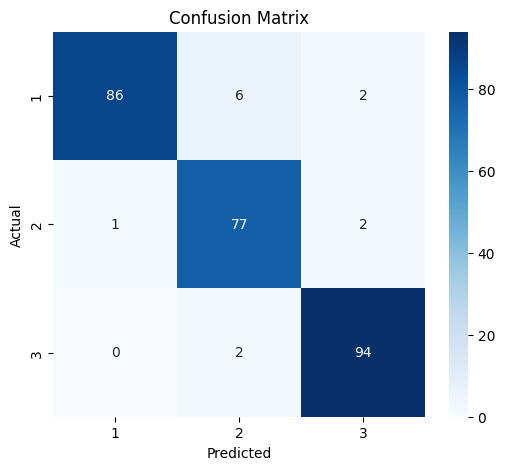

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

#Visualisasi confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.91      0.95        94
           2       0.91      0.96      0.93        80
           3       0.96      0.98      0.97        96

    accuracy                           0.95       270
   macro avg       0.95      0.95      0.95       270
weighted avg       0.95      0.95      0.95       270



Tuning Parameter

In [11]:
from sklearn.model_selection import GridSearchCV

parameters = [
    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
    {'kernel': ['rbf'], 'gamma': [0.01, 0.1, 0.2, 0.5], 'C': [1, 10, 100, 1000]}
]

grid_search = GridSearchCV(SVC(decision_function_shape='ovr'), parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.1, 0.2, 0.5], 'kernel': ['rbf']}],
             scoring='accuracy')

In [12]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}


In [13]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.2f (+/-%0.02f) for %r" % (mean, std * 2, params))


0.89 (+/-0.06) for {'C': 1, 'kernel': 'linear'}
0.92 (+/-0.06) for {'C': 10, 'kernel': 'linear'}
0.92 (+/-0.06) for {'C': 100, 'kernel': 'linear'}
0.92 (+/-0.05) for {'C': 1000, 'kernel': 'linear'}
0.85 (+/-0.06) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.96 (+/-0.04) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.97 (+/-0.04) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.97 (+/-0.03) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.93 (+/-0.06) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.97 (+/-0.03) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.97 (+/-0.02) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.98 (+/-0.02) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.97 (+/-0.04) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.97 (+/-0.03) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.97 (+/-0.02) for {'C': 100, 'gamma': 0.2, 'kernel': 'rbf'}
0.98 (+/-0.02) for {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}
0.97 (+/-0.03) for {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
0.97 (+/-0.03) f

In [14]:
y_pred_svm = grid_search.predict(X_test)

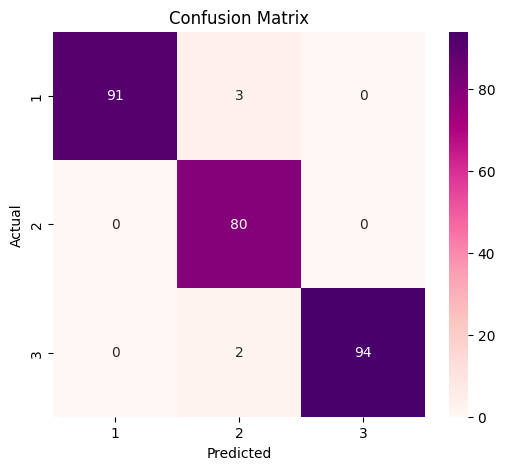

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_svm)

#Visualisasi confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='RdPu', fmt='g', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        94
           2       0.94      1.00      0.97        80
           3       1.00      0.98      0.99        96

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270



In [17]:
import joblib

# Simpan model SVM yang telah dilatih ke dalam file pkl menggunakan joblib
joblib.dump(svm, 'trained_svm_model.pkl')

# Simpan scaler ke dalam file pkl menggunakan joblib
joblib.dump(scaler, 'scaler.pkl')



['scaler.pkl']

In [20]:
import os
import cv2
import numpy as np
import pandas as pd

def resize_image(img, new_width, new_height):
    return cv2.resize(img, (new_width, new_height))

def extract_features_from_image(img):
    new_width = 256
    new_height = 256
    resized_img = resize_image(img, new_width, new_height)
    
    # Pra-pemrosesan
    img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
    
    # Fitur warna dalam RGB
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    hsv_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2HSV)
    
    hue_channel = hsv_img[:,:,0]
    saturation_channel = hsv_img[:,:,1]
    value_channel = hsv_img[:,:,2]

    hue_mean = np.mean(hue_channel)
    saturation_mean = np.mean(saturation_channel)
    value_mean = np.mean(value_channel)

    hue_std = np.std(hue_channel)
    saturation_std = np.std(saturation_channel)
    value_std = np.std(value_channel)

    # Buat vektor dari kombinasi fitur
    vector = [red_mean, green_mean, blue_mean, red_std, green_std, blue_std,
              hue_mean, saturation_mean, value_mean, hue_std, saturation_std, value_std]

    return vector

def predict_single_image(img):
    # Ekstraksi fitur dari gambar
    features = extract_features_from_image(img)
    
    # Konversi fitur ke DataFrame
    df = pd.DataFrame([features], columns=['mean_r', 'mean_g', 'mean_b', 'stddev_r', 'stddev_g', 'stddev_b',
                                           'mean_h', 'mean_s', 'mean_v', 'stddev_h', 'stddev_s', 'stddev_v'])
    
    return df

def predict_new_image(img):
    # Ekstraksi fitur dari gambar
    features = extract_features_from_image(img)
    
    # Skala fitur menggunakan scaler yang sama dengan data latih
    features_scaled = scaler.transform([features])
    
    # Prediksi menggunakan model SVM
    prediction = grid_search.predict(features_scaled)
    
    # Interpretasi hasil prediksi dan mengembalikan label kelas
    if prediction == 1:
        return "Kelas 1 (Segar)"
    elif prediction == 2:
        return "Kelas 2 (Tidak Segar)"
    else:
        return "Kelas 3 (Busuk)"

# Contoh penggunaan:
img_path = 'D:\\KULIAH\\Semester 8\\Skripsi\\dataset\\data_kembung/201.jpg'
img = cv2.imread(img_path)

if img is None:
    print("Unable to read image:", img_path)
else:
    predicted_label = predict_new_image(img)
    print("Prediksi untuk gambar baru:", predicted_label)


Prediksi untuk gambar baru: Kelas 3 (Busuk)


d:\KULIAH\Semester 8\Skripsi\app-deteksi\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
